## Challenge #1: Breast Cancer Dataset EDA

The “wdbc” data-set you will be working with can be downloaded from here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
Please produce a well-presented Jupyter notebook – including any visualisations you feel are useful – which addresses the following:
a.	What are the mean, median and standard deviation of the “perimeter” feature?
b.	Is the first feature in this data set (the “radius”) normally distributed? Quantify your answer. If not, what might be a more appropriate distribution?
c.	Train a classifier to predict the diagnosis of malignant or benign. Compare the results of two classifiers e.g. SVM, logistic regression, decision tree etc.

In [1]:
#Requirements and settings
#python3.8
#Installations: pandas, numpy,sklearn, matplotlib, math and scipy

In [2]:
#library imports
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, roc_curve

import matplotlib.pyplot as plt
import math
from scipy import stats

In [3]:
#function to import and clean file
def get_data(file=""):
    '''
    Input
        file: the file name with full path if not in the current directory.
    Output
        dataframe: returns a pandas dataframe after reading from path. This will return 0 if the file is not found.
    '''
    #handling base cases. Also a try-except to catch missing file error.
    if file=="" or file==None:
        print("File not found: Use proper file name")
        return 0
    else:
        try:
            data=pd.read_csv(file,header=None)
            print("File reading complete. File shape:",data.shape)
            #Use clean_data() function
            #Skipping clean_data() implementation for now as it is given that there are no missing attribute in data.
            #Cross checked missing values using "np.sum(dataset.isna(),axis=0).sum()", and found none.
            return data
        except:
            print("File does not exist")
            return 0

In [4]:
#reading the desired wdbc.data datset file in pandas dataframe for analysis
dataset=get_data("dataset/wdbc.data")
dataset.head()

File reading complete. File shape: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Updating datset column names using names listed in wdbc.names file
#Root features names. These features are from the cell nucleus data collected form tested patients.
features_names=["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]

#adding suffices in features names(10 features X3 metrics, i.e mean, standard error and maximum) 
features_mean=[s + "_mean" for s in features_names]
features_std_error=[s + "_std_error" for s in features_names]
features_max=[s + "_max" for s in features_names]

#merging all names and updating as dataset columns
dataset.columns=["id_number","diagnosis"]+features_mean+features_std_error+features_max
dataset.columns

Index(['id_number', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_std_error', 'texture_std_error',
       'perimeter_std_error', 'area_std_error', 'smoothness_std_error',
       'compactness_std_error', 'concavity_std_error',
       'concave_points_std_error', 'symmetry_std_error',
       'fractal_dimension_std_error', 'radius_max', 'texture_max',
       'perimeter_max', 'area_max', 'smoothness_max', 'compactness_max',
       'concavity_max', 'concave_points_max', 'symmetry_max',
       'fractal_dimension_max'],
      dtype='object')

-----
-----
### Challenge 1a. What are the mean, median and standard deviation of the “perimeter” feature?

In [6]:
def get_stats(df=None,column=None):
    '''
    Input
        df: a dataframe
        column: column name for which we need to compute the stats
    Output
        Dictionary: this will return a dictionary with stats and 0 in case the column or dataframe is missing.
    '''
    if len(df)==0:
        print("Dataframe does not exist.")
        return 0
    else:
        if column in dataset.columns:
            return {"mean":df[column].mean(),
                    "median":df[column].median(),
                    "standard deviation":df[column].std()}
        else:
            print("Dataframe does not have this column name.")
            return 0

#getting stats on column parameter
get_stats(df=dataset,column="perimeter_mean")



{'mean': 91.96903339191564,
 'median': 86.24,
 'standard deviation': 24.298981038754906}

-----
-----
### Challenge 1b. 
Is the first feature in this data set (the “radius”) normally distributed? Quantify your answer. 
If not, what might be a more appropriate distribution?

### Solution: 
We check this qualitatively using plot and quantitatively using statistical tests as follows.


mean 14.127291739894552 
std 3.5240488262120775 
sum of std error -1.0191847366058937e-13


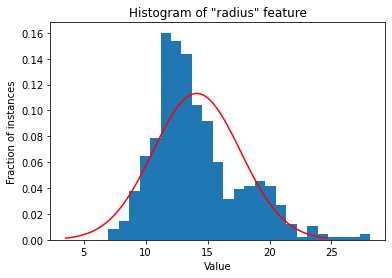

In [7]:
#Qualitative check: Histogram to empirically check the bell shaped normal distribution
series=dataset["radius_mean"]
mu=get_stats(df=dataset,column="radius_mean")["mean"]
sigma=get_stats(df=dataset,column="radius_mean")["standard deviation"]
print("mean",mu,"\nstd",sigma,"\nsum of std error",sum((series-mu)/sigma))

plt.hist(series, 25, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color="red")
plt.xlabel('Value')
plt.ylabel('Fraction of instances')
plt.title('Histogram of "radius" feature')
plt.show()

### Inference from the above plot:
The plot shows on y-axis= fraction of instances in that bin and x-axis= value of the feature.
The blue bars are actual data points in bins and the red line is normal distribution based on mean and sigma.
We see that the distribution (blue bars) is not perfectly overlapping with the expected normal line (in red).
Moreover, we empirically observe a bimodal distribution with two modes here, one near value=12 and another near value=19.
One possible reason could be different (here two) radius size of cells due to cancer development and non development. In case of cancer development, a person's infected cell shapes are abnormally different. 

In [8]:
#Quantitative check: Using Shapiro-Wilk Test 
test_value, p_value=stats.shapiro(series)
print("Stat's test value:",test_value)
print("Stat's p-value:",p_value)

significance=0.05

if p_value<0.05:
    print("This is not a normal distribution")
else:
    print("This is a normal distribution")

Stat's test value: 0.9410696029663086
Stat's p-value: 3.1061551985026026e-14
This is not a normal distribution


### Inference from the above statistical test:
The stats on radius feature's has p value <0.05 hence we "reject" the null hypothesis (i.e. distribution is normal). 
This means that the distribution of radius is "not" Gaussian as there is significant (p<0.05) difference 
from the expected normal distribution.
This is same to which we see from the empirical analysis of plot above, i.e. the distribution is 
not a normal distribution rather shows a bimodal pattern.

-----
-----
### Challenge 1c. Train a classifier to predict the diagnosis of malignant or benign. 
Compare the results of two classifiers e.g. SVM, logistic regression, decision tree etc.

### Solution:
Recipe to train and test classifiers is as follows:
1. Normalise the data: Mean normalisation
2. Split the data: (train:test)
3. Build models: Logistic Regression (LR), Support Vector Machine (SVM) and Random Forest (RF)
4. Compare performance: Accurary, F1-scores and ROC plot


In [9]:
# 1. Taking independent variables (features) in X and normalising them. Also, dependent variable is taken in y.
X=dataset.iloc[:,2:32]
X
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print("-->Features matrix\n",X_scaled)

y=dataset.iloc[:,1]
print("\n-->Actual labels\n",y.value_counts())
print("\n-->Percentage of each label\n",y.value_counts()/len(y)*100)
#M indicates malignant, i.e. development of cancer

-->Features matrix
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]

-->Actual labels
 B    357
M    212
Name: diagnosis, dtype: int64

-->Percentage of each label
 B    62.741652
M    37.258348
Name: diagnosis, dtype: float64


In [10]:
#2. Split the data: train:test (80:20)

X_train, X_test, y_train, y_test =  train_test_split(X_scaled, y,test_size=0.2,random_state=0)
print("Shape of X train",X_train.shape)
print("Shape of X test",X_test.shape)
print("Shape of y train",y_train.shape)
print("Shape of y train",y_test.shape)

Shape of X train (455, 30)
Shape of X test (114, 30)
Shape of y train (455,)
Shape of y train (114,)


In [11]:
#3. build models:
# a) Logistic Regression (a linear model),
# b) SVM (non-linear gaussian kernel) and 
# c) Random Forest (bagging)

model_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
print("Built:",model_lr)

model_svm= svm.SVC(random_state=0,probability=True).fit(X_train, y_train)
print("Built:",model_svm)

model_rf = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)
print("Built:",model_rf)


Built: LogisticRegression(random_state=0)
Built: SVC(probability=True, random_state=0)
Built: RandomForestClassifier(random_state=0)


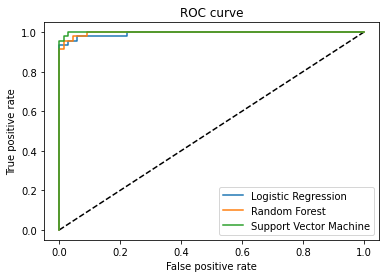

                    Model  Accuracy  F1-score
1  Support Vector Machine  0.973684  0.967742
2           Random Forest  0.964912  0.958333
0     Logistic Regression  0.964912  0.957447


In [12]:
#4. Compare performance
# a) Accurary, 
# b) F1 scores and
# c) ROC plots

#Compute and store accuracy as well as F1-score
performance=[]

performance.append(["Logistic Regression",model_lr.score(X_test, y_test),
                    f1_score(model_lr.predict(X_test),y_test,pos_label="M" )])
performance.append(["Support Vector Machine",model_svm.score(X_test, y_test),
                    f1_score(model_svm.predict(X_test),y_test,pos_label="M" )])
performance.append(["Random Forest",model_rf.score(X_test, y_test),
                    f1_score(model_rf.predict(X_test),y_test,pos_label="M" )])

performance=pd.DataFrame(performance,columns=["Model","Accuracy","F1-score"])
#Sort based on best F1-Score
performance=performance.sort_values(by="F1-score",ascending=False)

#Get model probabilities and plot ROC 
y_pred_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf,pos_label="M" )

y_pred_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr,pos_label="M" )

y_pred_svm = model_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm,pos_label="M" )

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

print(performance)

### Inference:
- We see that on test features (with mean normalisation) all three classifiers perform really well.
- We obtain high accuracy, F1-Score and AUC (see performace data frame and ROC plot above)
- SVM (using rbf kernel) performs the best with minor improvement over the other classifers
- Note: Cross-validation is not performed due to less data. Moreover, random forest does not require cross-validation as it is a bagging classifier using many decision trees.
